In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) #tells you what files are imported
        
#https://www.kaggle.com/reighns/titanic-a-complete-beginner-s-guide
#https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

# Survived = 1; Died = 0
# Pclass = Passenger Class = 1st, 2nd, third
# SibSp = number of siblings/spouses on board the titanic
# Parch = number of parents/children on board the titanic
# Embarked = where passengers got on; C = Cherbourg, S = Southampton, Q = Queenstown

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
df = pd.read_csv("../input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe(include=["O"]) #include only object columns, not numeric columns
#df.describe(include='all')
#data types explained: https://towardsdatascience.com/data-types-in-statistics-347e152e8bee

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carbines, Mr. William",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [4]:
#df.info() or .count() to see which columns have missing values
df.isnull().sum() #columns with null values and number of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#df.groupby("Survived").size() <-- counts number of dead and survived

#distribution in percentages in non-function form
(df["Survived"].value_counts()/df["Survived"].count())*100 #returns percentage of 0 = dead and 1 = survived

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [6]:
#distribution in percentages in function form
def data_in_percentages(df, columns):
    return (df[columns].value_counts()/df[columns].count()) * 100

print(data_in_percentages(df,"Survived"))
print(data_in_percentages(df,"Pclass"))
print(data_in_percentages(df,"Sex"))
print(data_in_percentages(df,"SibSp"))
print(data_in_percentages(df,"Parch"))
print(data_in_percentages(df,"Embarked"))

0    61.616162
1    38.383838
Name: Survived, dtype: float64
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
male      64.758698
female    35.241302
Name: Sex, dtype: float64
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64


In [7]:
#Filling in missing Embarked values
df = df.fillna({"Embarked": "S"})

In [8]:
#Filling in missing Age values
df["Salutation"] = df["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip()) #feature engineering
group = df.groupby(["Salutation","Sex","Pclass"]) #group by salutation, then sex, then pclass
group["Age"].apply(lambda x: x.fillna(x.median()))
df["Age"].fillna(df["Age"].median)
df.head()
#df = df["Age"].fillna(df["Age"].median)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [9]:
df.isnull().sum()
#Only null values for Cabin left, will drop it because too many missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Salutation       0
dtype: int64

In [10]:
#convert categorical variables into indicator variables for ML
sex = pd.get_dummies(df["Sex"],drop_first=True) #avoid multicollinearity - one column being perfect predictor of another
embark = pd.get_dummies(df["Embarked"],drop_first=True)
#pclass = pd.get_dummies(df["Pclass"],drop_first=True)
df = pd.concat([df,sex,embark],axis=1) #add in new columns; no longer need Sex and Embark columns

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,1


In [12]:
#drop irrelevant columns
df.drop(["Sex","Embarked","Name","Ticket","Cabin","PassengerId","Salutation"],axis=1,inplace=True)

In [13]:
#cleansed data for ML
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [14]:
X = df.drop("Survived",axis=1) #all other dependent variables/features
y = df["Survived"] #independent variable you want to predict

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
#predictions = logmodel.predict(X_test)

(7, 0)

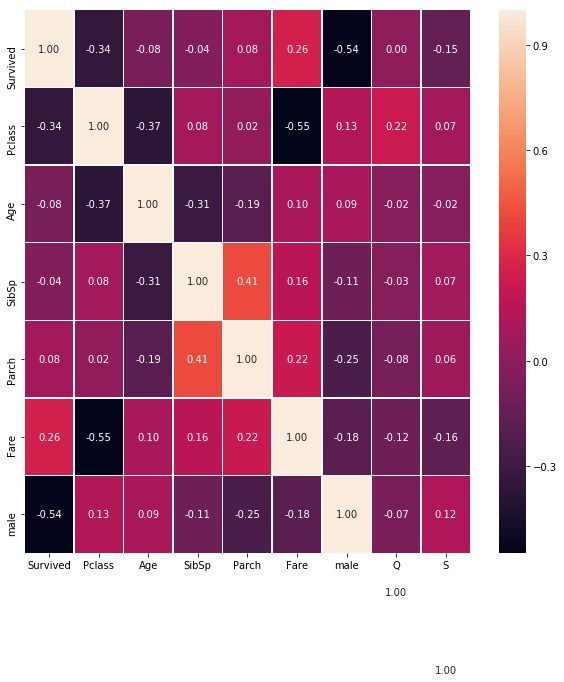

In [19]:
#Heatmap to observe correlation
anything, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax) #labels on grid, line space in between, 2 decimals float
ax.set_ylim(7, 0) #7 columns starting on first row

#correlation can help in predicting one attribute from another, which is a great way to impute missing values

In [20]:
#analyzing survivor data
survivors_df = df[df["Survived"] == 1]

print(data_in_percentages(survivors_df,"Pclass"))
print(data_in_percentages(survivors_df,"Sex"))
print(data_in_percentages(survivors_df,"SibSp"))
print(data_in_percentages(survivors_df,"Parch"))
print(data_in_percentages(survivors_df,"Embarked"))

1    39.766082
3    34.795322
2    25.438596
Name: Pclass, dtype: float64


KeyError: 'Sex'

In [21]:
print(survivors_df.groupby("Pclass").size())
print(survivors_df.groupby("Sex").size())
print(survivors_df.groupby("Age").size())
print(survivors_df.groupby("SibSp").size())
print(survivors_df.groupby("Parch").size())
print(survivors_df.groupby("Cabin").size())
print(survivors_df.groupby("Embarked").size())

Pclass
1    136
2     87
3    119
dtype: int64


KeyError: 'Sex'

In [22]:
#survivors_df.groupby("Age").apply(lambda x: x.mode())
survivors_df.groupby(["Age"])["Age"].agg(lambda x:x.value_counts())

Age
0.42     1.0
0.67     1.0
0.75     2.0
0.83     2.0
0.92     1.0
        ... 
58.00    3.0
60.00    2.0
62.00    2.0
63.00    2.0
80.00    1.0
Name: Age, Length: 65, dtype: float64